#  London City Crime Data Analysis

<b>By : Nivethan Kanagarasa<b/>

<p>This Research aims to express plot background criminal occurrences in the London city police area the UK, Where criminal investigation records are preserved for many years. However, this analysis focused on using the latest records which include the past two years' data (2018/01 - 2020/10).</p> <p>This research establishes an approach of detailing crimes in a particular geographic area which is London city by analyzing and studying the criminal occurrences of the area.</p>

## 1. Reporting Data Sets

The below used data sets have been used from the https://data.police.uk.

### <u>Importing Data Sets</u>

In [4]:
#import glob and pandas library
import glob
import pandas as pd

# set the path of data sets
path = r'E:\python Assignment\Data\cityoflondon3year' 

#get all files from file path
all_files = glob.glob(path + "/*.csv")

#create empty listf for add list file
li = []

#insert the file names in li list
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    
#join the all month of data and create data frame
cityoflondon3year = pd.concat(li, axis=0, ignore_index=True,sort=True)

#get the data sample 
cityoflondon3year.head()



,Context,Crime ID,Crime type,Falls within,LSOA code,LSOA name,Last outcome category,Latitude,Location,Longitude,Month,Reported by
0,NaN,fb5980f681cc55836191d8537790a1629eb264de22acdf...,Other theft,City of London Police,E01000916,Camden 027B,Investigation complete; no suspect identified,51.518207,On or near Charterhouse Street,-0.106453,2018-01,City of London Police
1,NaN,NaN,Anti-social behaviour,City of London Police,E01000914,Camden 028B,NaN,51.518632,On or near Brownlow Street,-0.114954,2018-01,City of London Police
2,NaN,NaN,Anti-social behaviour,City of London Police,E01000914,Camden 028B,NaN,51.518632,On or near Brownlow Street,-0.114954,2018-01,City of London Police
3,NaN,60bf92023cede4382d088f3ef60c6536aac816744bd3cb...,Burglary,City of London Police,E01000914,Camden 028B,Offender given community sentence,51.518226,On or near Pedestrian Subway,-0.111497,2018-01,City of London Police
4,NaN,999497aac964c9cd1450eef9a88872a58b6ef2d09eaa99...,Theft from the person,City of London Police,E01000914,Camden 028B,Investigation complete; no suspect identified,51.518494,On or near Nightclub,-0.111962,2018-01,City of London Police


From the above data, we can found 12 columns. Even there are 12 columns the context and crime id column is not useful data for further analysis. let's see the more about data below.

In [5]:
#get information about the data
cityoflondon3year.info()
#get null values in column
cityoflondon3year.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23603 entries, 0 to 23602
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Context                0 non-null      float64
 1   Crime ID               20322 non-null  object 
 2   Crime type             23603 non-null  object 
 3   Falls within           23603 non-null  object 
 4   LSOA code              21871 non-null  object 
 5   LSOA name              21871 non-null  object 
 6   Last outcome category  20322 non-null  object 
 7   Latitude               21871 non-null  float64
 8   Location               23603 non-null  object 
 9   Longitude              21871 non-null  float64
 10  Month                  23603 non-null  object 
 11  Reported by            23603 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.2+ MB


Context                  23603
Crime ID                  3281
Crime type                   0
Falls within                 0
LSOA code                 1732
LSOA name                 1732
Last outcome category     3281
Latitude                  1732
Location                     0
Longitude                 1732
Month                        0
Reported by                  0
dtype: int64

<p>We can see that all context value is null and crime id data is useless we can't get any useful information within this data so I am going to remove these 2 columns.</p>
<p>Still there are some null values here but we are going to remove the LSOA code, LSOA name, latitude, longitude. we will deal with the Last outcome category later. because it has a 25% null value. we all know Data is precious. I am not going to remove all null data.</p>

### <u>Cleaning Data</u>

We are going to clean the data sets before we use them to analyze. Cleaning the data finds the missing value and remove them from the data sets, which will make the data sets clean to do an accurate analysis. 

In [6]:
#remove crime id and context column
cityoflondon3year = cityoflondon3year.drop(['Context','Crime ID'], axis=1)

#oveview of data
cityoflondon3year.head()


,Crime type,Falls within,LSOA code,LSOA name,Last outcome category,Latitude,Location,Longitude,Month,Reported by
0,Other theft,City of London Police,E01000916,Camden 027B,Investigation complete; no suspect identified,51.518207,On or near Charterhouse Street,-0.106453,2018-01,City of London Police
1,Anti-social behaviour,City of London Police,E01000914,Camden 028B,NaN,51.518632,On or near Brownlow Street,-0.114954,2018-01,City of London Police
2,Anti-social behaviour,City of London Police,E01000914,Camden 028B,NaN,51.518632,On or near Brownlow Street,-0.114954,2018-01,City of London Police
3,Burglary,City of London Police,E01000914,Camden 028B,Offender given community sentence,51.518226,On or near Pedestrian Subway,-0.111497,2018-01,City of London Police
4,Theft from the person,City of London Police,E01000914,Camden 028B,Investigation complete; no suspect identified,51.518494,On or near Nightclub,-0.111962,2018-01,City of London Police


In [7]:
#Removethe raw which contains null values in these column  LSOA code, LSOA name, latitude, longitude 
clean_cityoflondon3year= cityoflondon3year.dropna(subset=['Latitude', 'Longitude','LSOA code','LSOA name'])

#get null value details
clean_cityoflondon3year.isnull().sum()

Crime type                  0
Falls within                0
LSOA code                   0
LSOA name                   0
Last outcome category    3100
Latitude                    0
Location                    0
Longitude                   0
Month                       0
Reported by                 0
dtype: int64

<B>We will create following data frames. which are 2020 year data and 2020 oct month data for futher analysis.</B>


In [8]:
#get 2020 data from total data
cityoflondon2020 = clean_cityoflondon3year[clean_cityoflondon3year.Month.str.contains('2020')]


#-------------------------------------------------------------

#get 2020 oct data from total data
cityoflondon20_oct = clean_cityoflondon3year[clean_cityoflondon3year.Month.str.contains('2020-10')]


From the above codes, we have to get cleaned the data. Which is the best way rather than import those files and clean again.

In [9]:
#Add outcome data
# set the path of data sets
path = r'E:\python Assignment\Data\londonOutcome' 
#get all files from file path
all_files = glob.glob(path + "/*.csv")

lio = []
#insert the file names in li list
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lio.append(df)
    
#join the all month of data and create data frame
londonOutcome = pd.concat(lio, axis=0, ignore_index=True,sort=True)

#get the data sample 
londonOutcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461 entries, 0 to 6460
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age range                                 6031 non-null   object 
 1   Date                                      6461 non-null   object 
 2   Gender                                    6404 non-null   object 
 3   Latitude                                  4516 non-null   float64
 4   Legislation                               6419 non-null   object 
 5   Longitude                                 4516 non-null   float64
 6   Object of search                          6363 non-null   object 
 7   Officer-defined ethnicity                 6063 non-null   object 
 8   Outcome                                   6374 non-null   object 
 9   Outcome linked to object of search        6322 non-null   object 
 10  Part of a policing operation        

In [10]:
#clean data
# Policing operation ,Part of a policing operation are empty first remove that
londonOutcome=londonOutcome.drop(['Policing operation','Part of a policing operation'], axis=1)

#remove null value data row
londonOutcome = londonOutcome.dropna()
#get info of data
londonOutcome.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 1 to 6460
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age range                                 4041 non-null   object 
 1   Date                                      4041 non-null   object 
 2   Gender                                    4041 non-null   object 
 3   Latitude                                  4041 non-null   float64
 4   Legislation                               4041 non-null   object 
 5   Longitude                                 4041 non-null   float64
 6   Object of search                          4041 non-null   object 
 7   Officer-defined ethnicity                 4041 non-null   object 
 8   Outcome                                   4041 non-null   object 
 9   Outcome linked to object of search        4041 non-null   object 
 10  Removal of more than just outer clot

Now we have only clean data sets.

## 2. Analyze and Visualize the Crime Type Data 

In the below part we are going to analyze the data in several variations to get a clear understanding of the crimes that happened in London city using the cleaned data which we separated above. 

### <U>2020 Crime Type Analysis by Comparing Total Three years Data </U>

In [11]:
#get 3 year crime type with count data
df3year=clean_cityoflondon3year.groupby(['Crime type']).size().reset_index(name='Total crime 3year')

#get 2020 crime type with count data
df2020=cityoflondon2020.groupby(['Crime type']).size().reset_index(name='Total crime2020')

#join both data frame
london2020_3year = pd.merge(df3year, df2020, left_index=True, on='Crime type',how='inner' )

#create new crimeType percentage column
london2020_3year['crime_2020_percent'] = (london2020_3year['Total crime2020'] / 
                      london2020_3year['Total crime2020'].sum()) * 100

#create new crimeType percentage column
london2020_3year['crime_Last_3year_percent'] = (london2020_3year['Total crime 3year'] / 
                      london2020_3year['Total crime 3year'].sum()) * 100
#get the data frame over view
london2020_3year.head()

,Crime type,Total crime 3year,Total crime2020,crime_2020_percent,crime_Last_3year_percent
0,Anti-social behaviour,3100,518,11.329834,14.174020
1,Bicycle theft,1245,381,8.333333,5.692469
2,Burglary,798,174,3.805774,3.648667
3,Criminal damage and arson,674,185,4.046369,3.081706
4,Drugs,1468,446,9.755031,6.712084


In [12]:
#rename Crime type column beacaues there is a space in the name.
london2020_3year=london2020_3year.rename(columns={"Crime type": "crime_type"}, errors="raise")
london2020_3year.head()

,crime_type,Total crime 3year,Total crime2020,crime_2020_percent,crime_Last_3year_percent
0,Anti-social behaviour,3100,518,11.329834,14.174020
1,Bicycle theft,1245,381,8.333333,5.692469
2,Burglary,798,174,3.805774,3.648667
3,Criminal damage and arson,674,185,4.046369,3.081706
4,Drugs,1468,446,9.755031,6.712084


In [13]:
#import matplotlib library
import matplotlib.pyplot as plt

#initialize the plot size
plt.rcParams["figure.figsize"] = (15,10)

#create data frames
labels = london2020_3year['crime_type']
values1 = london2020_3year['crime_2020_percent']
values2 = london2020_3year['crime_Last_3year_percent']
 
#plot two bar chart in single graph    
bp_dict = plt.barh(labels, values1, align='edge', height=-0.4,label="2020")
bp_dict = plt.barh(labels, values2, align='edge', height=0.4,label="Last 3 Year")

#set title
plt.title('2020 & Last 3 year percentage',fontsize=18)

#set xlabel
plt.xlabel('percentage',fontsize=14)

#set xlabel
plt.ylabel('crime type',fontsize=14)

#Change the appearance of ticks, tick labels,
plt.tick_params(axis='both',labelsize=14)

#add legend
plt.legend(loc="upper right",prop={'size': 14})

When evaluvating some of the crimes like Violence and sexual offences, Robbery, Other Theft, and Anti-social behaviour have been reduced in percentage when comparing the total 3 years crime. And crimes like shoplifitng, Drugs, Bicycle theft have been increased.

This Analysis shows that "Other theft" is at a high rate and it is more than 800 comparing to other crimes in London city. At the same time, crimes such as violence and sexual offenses, shoplifting, and anti-social behavior are also high in the city and these are nearly 600. And Public order is the least crime in London city and only below 200 crimes are recorded in the past 3 years in London city.

### <u>Pie Chart Analysis of Crime Types</u>

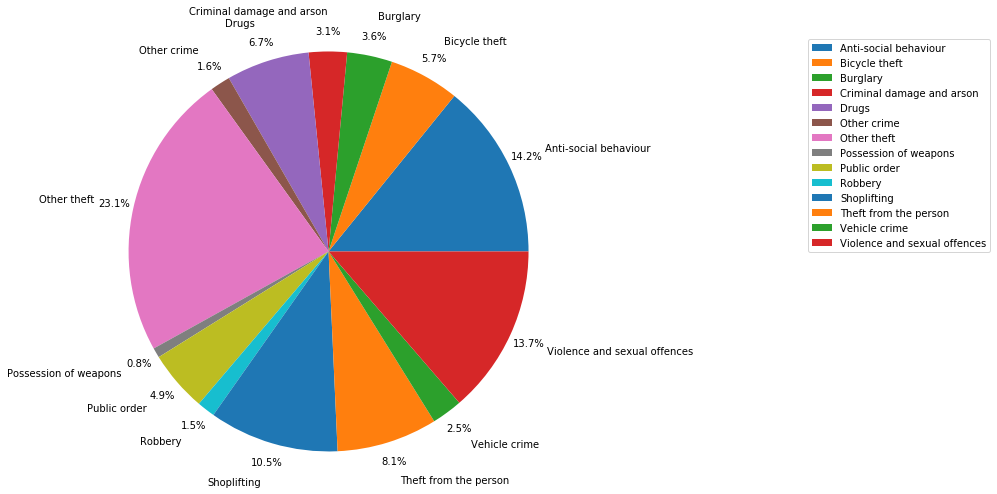

In [15]:
#3 year data
import matplotlib.pyplot as plt
#set graph size
plt.rcParams["figure.figsize"] = (8,8)

#get crime type with no of crime
dfnew=clean_cityoflondon3year.groupby(['Crime type']).size().reset_index(name='Total crime')

#draw the graph
fig, ax = plt.subplots()
ax.pie(dfnew['Total crime'],labels=dfnew['Crime type'], autopct='%1.1f%%',pctdistance=1.1, labeldistance=1.2,)
ax.axis('equal') 

#set legend
plt.legend(bbox_to_anchor=(2, 1), ncol=1, loc='upper right')

#visualize the graph
plt.show()

This Pie chart gives us the accurate analysis of every crime types in London City police. Here we can see that largest percentage comes up with the “Other type" category which is 23.1%. And the Violence and sexual offences crime type is the second place which is 13.7%. Comparing with other crime records possession of weapons is the least crime recorded in the past three years which in only 0.8%.

### <u>Crime Vs Month Analysis</u>

Text(0.5, 1.0, 'crime vs month')

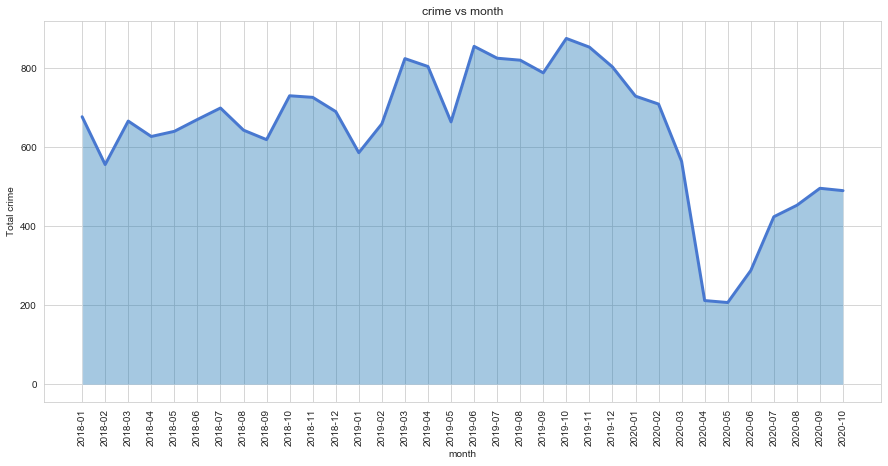

In [16]:
# import seabornlibrary
import seaborn as sns
# import matplotlib library
from matplotlib import pyplot as plt

#set grid
sns.set_style("whitegrid")

#initialize graph size
plt.rcParams["figure.figsize"] = (15,7) 

# Color palette
blue, = sns.color_palette("muted", 1)
#create new data frame month and count
dfmonth=clean_cityoflondon3year.groupby(['Month']).size().reset_index(name='Total crime')

#plot the area chart
fig, ax = plt.subplots()
ax.plot(dfmonth['Month'],dfmonth['Total crime'], color=blue, lw=3)
ax.fill_between(dfmonth['Month'], 0, dfmonth['Total crime'], alpha=.4)

#rotate month value
plt.xticks(rotation=90)

#add month label
plt.xlabel('month') 
  
#add y label
plt.ylabel('Total crime') 
  
#add crime
plt.title('crime vs month') 
 


<p>From the above graph we can analyze the trend of the total number of crimes which have been recorded throughout this past 3 years by month.</p><p>We can identify that rather than 2018 more crimes have been recorded in 2019. There we lots of ups and down in the crime count by each month but we can identify that during the winter season the crime rates have been reduced rather than summer and autumn.</p><p>And also, We can notice a huge drop in the graph on the time of the year 2020 April. Even there can be many reasons behind that but the main reason for this sudden drop is the COVID situation and the lockdown situation due to the covid.</p>

### <u> Pie Chart of Age-range</u>

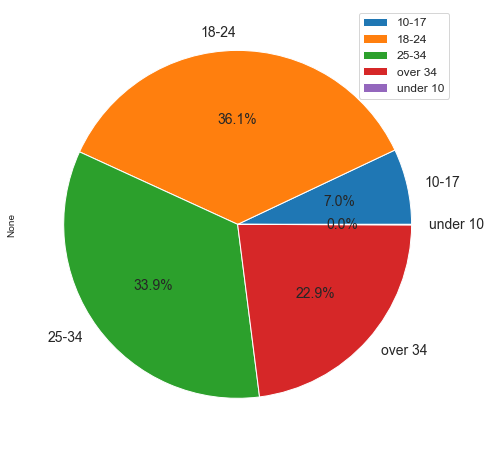

In [17]:
#create pie chart with legend for age
londonOutcome.groupby('Age range').size().plot(kind ='pie',autopct='%1.1f%%',figsize=(8, 8),fontsize=14)
plt.legend(loc='upper right', prop={'size': 12})

This above Pie chart illustrates that age group of 18-24 have been more involved in London city which is 36%. And the age group in second place is 25-34. However we can identify no one in the age group of fewer than 10 involved in crimes.

### <u> Pie Chart of Gender</u>

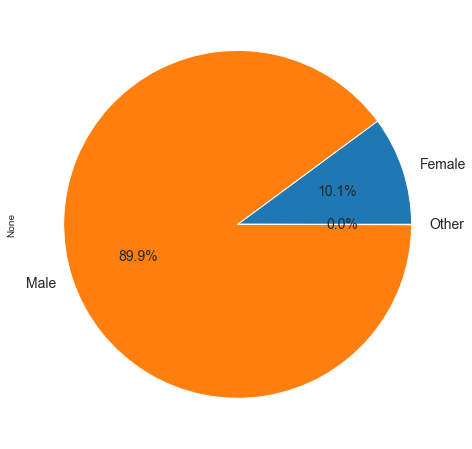

In [18]:
#create pie chart gender
londonOutcome.groupby('Gender').size().plot(kind ='pie',autopct='%1.1f%%',figsize=(8, 8),fontsize=14)

We can cleary note that most of the male in the London city which is 89.9% have involoved in crimes. And only 10.1% of Females have been invloved in crimes.

### <u> Crime Type Analysis by Months according to Crime Count</u>


In [19]:
# create data frame for month and specific crime type count
dfdata_tab=clean_cityoflondon3year.groupby(['Crime type','Month']).size().unstack(0)
dfdata_tab.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2018-01 to 2020-10
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Anti-social behaviour         34 non-null     float64
 1   Bicycle theft                 34 non-null     float64
 2   Burglary                      34 non-null     float64
 3   Criminal damage and arson     34 non-null     float64
 4   Drugs                         34 non-null     float64
 5   Other crime                   34 non-null     float64
 6   Other theft                   34 non-null     float64
 7   Possession of weapons         34 non-null     float64
 8   Public order                  34 non-null     float64
 9   Robbery                       33 non-null     float64
 10  Shoplifting                   34 non-null     float64
 11  Theft from the person         34 non-null     float64
 12  Vehicle crime                 34 non-null     float64
 13  V

we can notice that the month column is not avaliable. so we are going to add month column below and do the analysis. 

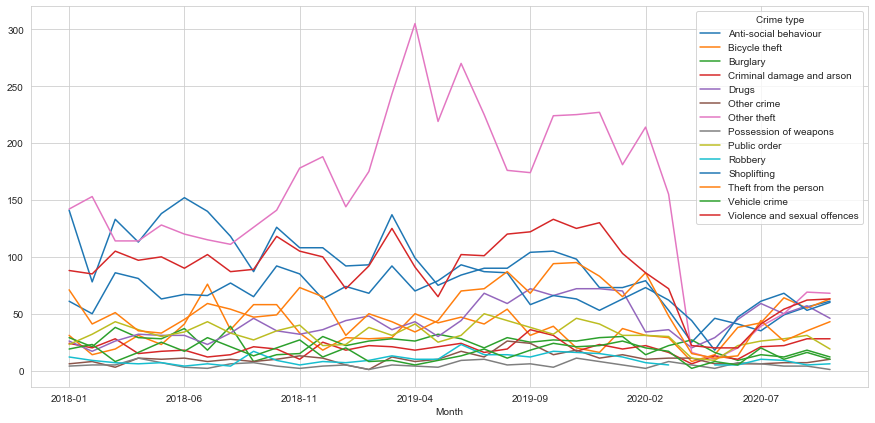

In [20]:
#we need to add month column so we create month list
dfmonth=clean_cityoflondon3year.groupby(['Month']).size().reset_index(name='noOfcrime')
month1=dfmonth['Month']

#get all month in list
list1=[]
for month in month1:     
    list1.append(month)

#add month list

dfdata_tab['Month'] = list1 
dfdata_tab
dfdata_tab.plot.line(x='Month')

From the above graph, we can only "other theft" crime type is having more fluctuation in the count by each month. But this has shown a dramatic drop after 2020-02 which is after covid. other crime types are shown with minor ups and downs with the count.

### <u>Crime Analysis according Local Authority</u>

We can notice the LSOA name has 4 digits end of it so when we remove the last 4 digit we can get local area data.

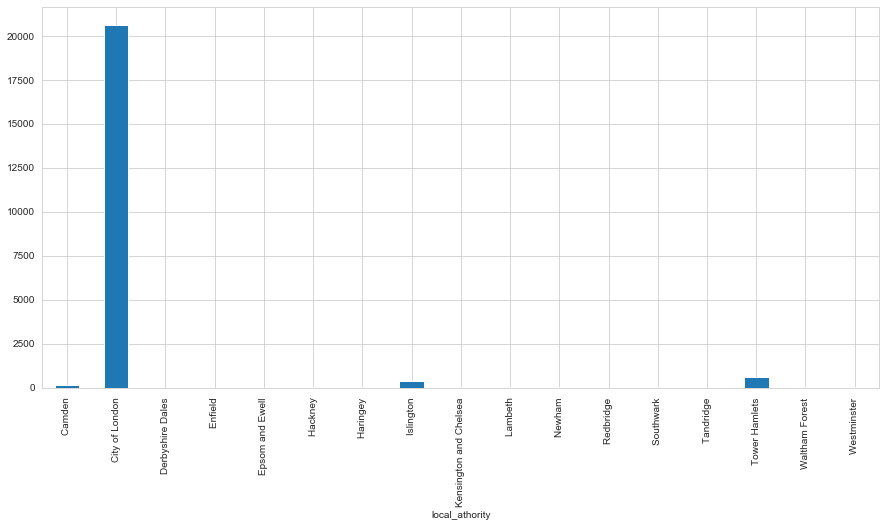

In [21]:
#take a copy of clean_cityoflondon3year
clean_cityoflondon3year=clean_cityoflondon3year.copy()

#add local athority column
clean_cityoflondon3year['local_athority'] = clean_cityoflondon3year['LSOA name'].str[:-4]

#plot bar chart
clean_cityoflondon3year.groupby('local_athority').size().plot(kind ='bar')
plt.show()


We can conclude that city of London local authority have recorded as major crime area than other local authorities, Which have more than 20000 recordes as per the data.

### <u>Analysis of Crime Count as per Last Outcome</u>

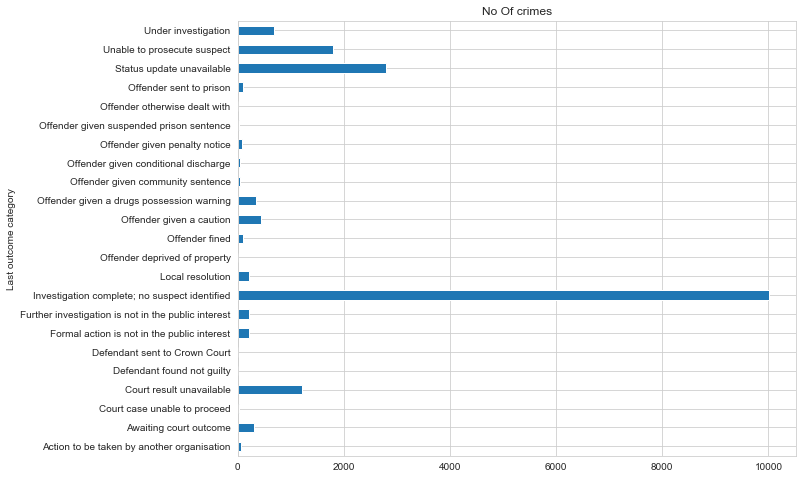

In [22]:
#plot horizontal barchart
clean_cityoflondon3year.groupby('Last outcome category').size().plot(kind='barh',figsize=(10, 8),  title="No Of crimes")
plt.show()

We can notice that nearly 10000 cases that have been recorded have a complete investigation and no suspect identified. This is quite interesting but disappointing that no suspects have been identified even after the investigation.<p> And also we can notice that the offender sent to prison is very least even it is less than 500. Also, there cases nearly 2000 which are still under investigation. </p>

### <u>Deep Crime Type Analysis using Annova Test</u>

<p>We will do some hypothesis test and see the results</p>
    <p>1) Are there any significant relationship between some crime type.</p>
    <p>2) London crime and Norfolk have any correlation.</p>


In [23]:
#Annova test
# we will do the anova test for crime category
import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(dfdata_tab['Other theft'], dfdata_tab['Bicycle theft'], dfdata_tab['Burglary'],
                                dfdata_tab['Theft from the person'] )

print('fvalue=',fvalue,' pvalue=' ,pvalue)

fvalue= 69.6129016255701  pvalue= 4.677343470873177e-27


Here I have took the 3 data’s which is related Theft therefore we could compare them easily. <p>We can clearly see the p value is greater than 0.05 so we will go with null hypothesis. So there is a significant relationship between these crime.</p>

### <u>Boxplot Analysis of Crime Type</u>

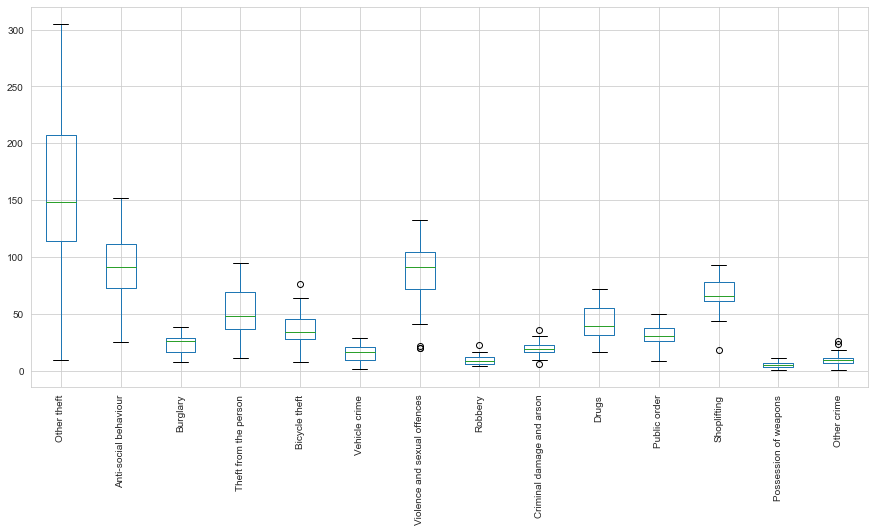

In [24]:
#boxplot

df_crime_type=clean_cityoflondon3year['Crime type'].unique() 
#add column type in list
listTy = []
#create crime type in list 
for crime in df_crime_type:     
    listTy.append(crime)

#plot the box plot
boxplot = dfdata_tab.boxplot(column=listTy, rot=90)



With this above analysis we can got to know the median value of each crime types. And also we can find some outliers in bicycle theft,violence andsexual offences, Robbery, Criminal damage and arson, shoplifting and other crime catogaries.

### <u>Corelation Analysis between London & Nortfolk</u>

In [25]:
path = r'E:\python Assignment\Data\norfolk' 
# get all file
all_files = glob.glob(path + "/*.csv")

lin = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lin.append(df)
#join the all month of data

# axis 0  means index wise , axis 1 means column wise 
norfolkdata = pd.concat(lin, axis=0, ignore_index=True,sort=True)

#get the data sample 
norfolkdata.head()


,Context,Crime ID,Crime type,Falls within,LSOA code,LSOA name,Last outcome category,Latitude,Location,Longitude,Month,Reported by
0,NaN,a89eb6aad261b15c59f9f0fe7d106ca77e96ed1bd0e5a8...,Violence and sexual offences,Norfolk Constabulary,E01026034,Boston 006C,Unable to prosecute suspect,52.942793,On or near South Street,-0.157802,2018-01,Norfolk Constabulary
1,NaN,NaN,Anti-social behaviour,Norfolk Constabulary,E01026436,Breckland 001A,NaN,52.746451,On or near Meadow Loke,1.027223,2018-01,Norfolk Constabulary
2,NaN,22feaf59d2c882645605c10887397e30d9dc543fe988da...,Burglary,Norfolk Constabulary,E01026436,Breckland 001A,Investigation complete; no suspect identified,52.747726,On or near Reeves Close,1.033254,2018-01,Norfolk Constabulary
3,NaN,2170e5022dd0c5160dd9a334c055dfb852f8559082a32f...,Burglary,Norfolk Constabulary,E01026436,Breckland 001A,Investigation complete; no suspect identified,52.748160,On or near Sports/Recreation Area,1.031402,2018-01,Norfolk Constabulary
4,NaN,6d15dad2494a6a57eaff603602022327db8a836d199a79...,Other theft,Norfolk Constabulary,E01026436,Breckland 001A,Investigation complete; no suspect identified,52.729600,On or near Nowhere Lane,1.082968,2018-01,Norfolk Constabulary


In [26]:
#clean city of norfolk data
norfolkdata = norfolkdata.drop(['Context','Crime ID'], axis=1)
norfolkdataclean= norfolkdata.dropna(subset=['Latitude', 'Longitude','LSOA code','LSOA name'])


In [27]:
# create london crime data  
df_london=clean_cityoflondon3year.groupby(['Month']).size().reset_index(name='Total crime london')
# create norfolk crime data  
df_norfolk=norfolkdataclean.groupby(['Month']).size().reset_index(name='Total crime norfolk')


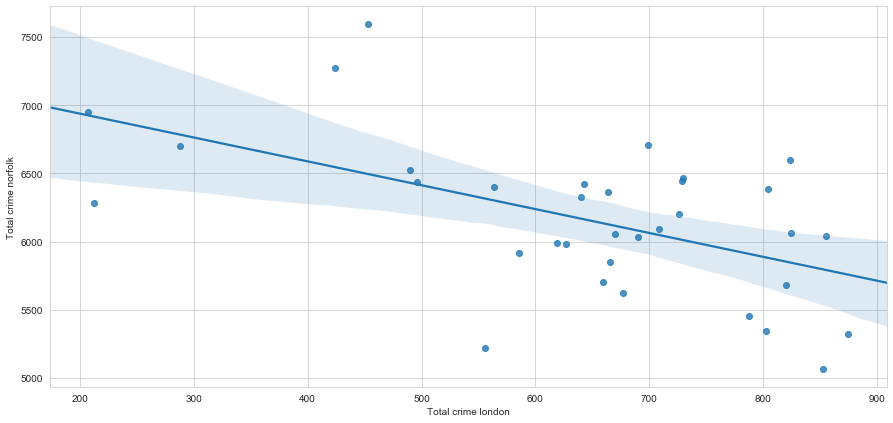

In [28]:
#join london and norfolk data
result = pd.concat([df_london, df_norfolk], axis=1, sort=False)

import seaborn as sb
from matplotlib import pyplot as plt

#plot the reg plot
sb.regplot(x = "Total crime london", y = "Total crime norfolk", data = result)
plt.show()

In [29]:
#import scientific python 
from scipy.stats import shapiro
# normality test
stat, p = shapiro(result['Total crime norfolk'])
print('Statistics_norfolk=%.3f, p=%.3f' % (stat, p))

Statistics_norfolk=0.977, p=0.685


In [30]:
# normality test
stat, p = shapiro(result['Total crime london'])
print('Statistics_london=%.3f, p=%.3f' % (stat, p))

Statistics_london=0.907, p=0.007


<p>We have check the p value for normality test. If a p-value > 0.05 then it is normality distributed.</p>
Hence Norfolk Data is greater than 0.5 it is normal distributed but London data is not normal distributed because it is less than 0.5.
If a data reject normality we should go with non-normal correlation test which is Spearman correlation.



In [31]:
#calculate corelation
import scipy.stats
#Spearman corelation 
scipy.stats.spearmanr(result['Total crime norfolk'], result['Total crime london'])

SpearmanrResult(correlation=-0.43223834988540866, pvalue=0.01068315523527771)

In the result of Spearman corelation, p value is less than 0.05.
so we can say there is no relation betbeen both 2 dataset (london crime and norfolk)

### <u>Crime Type Analysis Using Area chart</u>

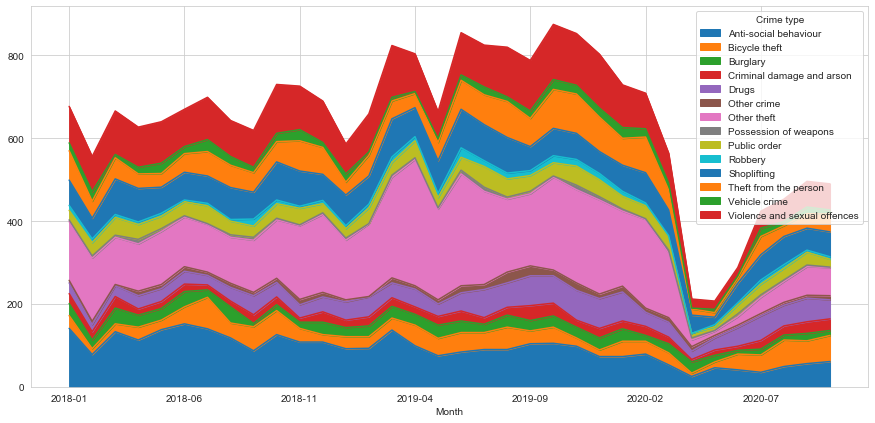

In [32]:
#area chart
dfdata_tab.plot.area(x='Month')

## 3. Advance analysis

### <U>Heat of Crimes in London </U>

In [33]:
#import folium library
import folium
from folium import plugins
from folium.plugins import HeatMap

#map center data
center = [ 51.514294, -0.091139]
map_crime = folium.Map(location=center, zoom_start=13)

#create location data
crime_area = list(zip(clean_cityoflondon3year.Latitude, clean_cityoflondon3year.Longitude))

#generate the heat map
heatmap=plugins.HeatMap(crime_area,radious=10)
map_crime.add_child(heatmap)
    
map_crime
                    

This map also show thatmore crimes are in middle of london.

### <U> Heatmap of Bicycle Theft in London City</U> 

In [34]:
 #bicycle theft area in london
    
center = [ 51.514294, -0.091139]
#create location data
map_crime = folium.Map(location=center, zoom_start=15)

#rename the column
bycle = clean_cityoflondon3year.rename(columns={"Crime type": "crime_type"}, errors="raise")

#get bicycle theft location data
bicycleTheft=bycle[bycle.crime_type.str.contains("Bicycle theft")]

crime_area = list(zip(bicycleTheft.Latitude, bicycleTheft.Longitude))

#generate the heat map
heatmap=plugins.HeatMap(crime_area,radious=0.5,blur=2)
map_crime.add_child(heatmap)
    
map_crime


The above Heat map plots the Locations of the bicycle theft happened. From this visualization we can find the heat area which is high in the bicycle theft.

### <U> Heatmap of Crimes nearby Supermarket in London City</U> 

In [35]:

#get On or near Supermarket location data
supermarket=clean_cityoflondon3year[clean_cityoflondon3year.Location.str.contains("On or near Supermarket")]

center = [51.519245, -0.087173]
map_crime = folium.Map(location=center, zoom_start=13)

#create location data
crime_area = list(zip(supermarket.Latitude, supermarket.Longitude))

#generate map
heatmap=plugins.HeatMap(crime_area,radious=0.5,blur=2)
map_crime.add_child(heatmap)
    
map_crime

So we can clearly identify the supermarket crime spots. Therefore people can be aware when they go near by those supermarkets and also police can give more security near those supermarkets. 

### <U>Heatmap of Normal month pre Lockdown</U>

In [36]:
#london has lock down in 2020 april so i am going to analysis lockdown time and othe time crime rate. 
#so i will take 2020 april and 2019 april.

In [37]:
lockdown = clean_cityoflondon3year[clean_cityoflondon3year.Month.str.contains('2020-04')]
normalday = clean_cityoflondon3year[clean_cityoflondon3year.Month.str.contains('2019-04')]

In [38]:
#lockdown map
center = [51.519245, -0.087173]
map_crime = folium.Map(location=center, zoom_start=14)

crime_area = list(zip(lockdown.Latitude, lockdown.Longitude))
#generate the map
heatmap=plugins.HeatMap(crime_area)
map_crime.add_child(heatmap)
    
map_crime

This picture illustrates the heat spots of crime before lockdown due to Covid. April month 2019 data have been to taken to analyze the pre covid situation

### <U>Heatmap of Lockdown month</U> 

In [39]:
#nrmal map
center = [51.519245, -0.087173]
map_crime = folium.Map(location=center, zoom_start=14)

crime_area = list(zip(normalday.Latitude, normalday.Longitude))
#generate the map
heatmap=plugins.HeatMap(crime_area)
map_crime.add_child(heatmap)
    
map_crime

This picture illustrates the heat spots of crime after lockdown due to Covid. April month 2020 data have been to taken to analyze the pre covid situation.

<center><b>************</b></center>